# Latar Belakang
Traveling bukan lagi sekedar gaya hidup. Bagi sebagian orang, itu menjadi sebuah kebutuhan yang harus dipenuhi. Seiring berjalannya waktu, banyak peluang baru dalam berbisnis, salah satunya adalah berbisnis dalam dunia traveling. Traveling sudah menjadi gaya hidup orang-orang saat ini. Traveling dapat diartikan dengan mengunjungi suatu tempat atau daerah untuk berlibur, akan tetapi traveling tidak hanya sekedar berlibur saja. Biasanya traveler (sebutan untuk orang yang sering melakukan traveling) melakukan perjalanan ke suatu tempat dan memiliki tujuan lain, yaitu mengenal lebih jauh tempat-tempat yang mereka kunjungi dengan persiapan yang matang. Didukung dengan majunya teknologi saat ini membuat tren traveling semakin banyak diikuti oleh berbagai kalangan dari seluruh penjuru dunia.
Kegiatan traveling saat ini hampir tidak bisa dilepaskan dari keberadaan perangkat mobile yang selalu menyertai rutinitas kegiatan sehari-hari. Ketika ingin memesan sesuatu bisa dilakukan dirumah dan menggunakan smartphone yang dimilikinya, lewat beragam aplikasi yang terpasang di smartphone, menggunakan smartphone yang dimilikinya, lewat beragam aplikasi yang terpasang di smartphone, aktivitas traveling kini semakin mudah dengan berbagai macam fungsi yang memperkaya pengalaman perjalanan kita, mulai dari pengatur rencana perjalanan, pencarian rekomendasi tempat, navigasi peta, hingga fungsi yang sepele seperti penyimpanan uang logam hasil perjalanan. Beragam aplikasi ini dapat membuat perjalananmu makin nyaman, baik itu perjalanan domestik ataupun internasional. Salah satu contohnya adalah ketika seseorang ingin pergi berlibur, orang tersebut tidak harus merasa takut tidak mendapatkan penginapan, karena penginapan tersebut sudah dapat dipesan melalui smartphone yaitu salah satunya dengan menggunakan aplikasi Airbnb.


## Pernyataan Masalah
Distributor sabun mandi sebagai ingin memetakan wilayah penginapan untuk target pasar untuk menyalurkan produk sabun yang dimiliki sebagaimana diketahui ini adalah kebutuhan dari penyedia tempat sewa properti dalam hal ini tarik data dari aplikasi Airbnb wilayah Bangkok. Informasi ini akan membantu distributor untuk pemetaan pasar sesuai target pasar dalam memenuhi pasokan layanan penyewaan tempat dan menjadikan daya tarik yang tepat bagi pengunjung dalam menggunakan dengan pemenuhan fasilitas yang diberikan

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Analisis Pengaruh Lokasi Dan Fasilitas Terhadap Keputusan Wisataawan Memilih Tempat Menginap Dengan Harga Sewa Sebagai Variabel Moderasinya**


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF?usp=drive_link). 

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, jenis, fasilitas, ketersediaan ruangan yang ditawarkan serta ulasan dan juga harga yang diisi ketika user melakukan pemesanan dari listing yang ditawarkan. Ada 16 kolom di dalam dataset Airbnb-Listing-Bangkok, yaitu:  

* id : Identitas unik Airbnb untuk tempat tersebut.
* name : daftar nama vendor atau pemilik properti (*fasilitas).
* host_id : Pengidentifikasi unik Airbnb untuk tuan rumah/pengguna. 
* host_name: Nama tuan rumah. Biasanya, hanya nama depan saja.
* neigborhood : Lingkungan atau kode geografis (*distrik*).
* latitude : pemetaan berdasarkan Garis Lintang (*scaled*)
* longitude : pemetaan berdasarkan Garis Bujur (*scaled*)
* room_type : Entire home/apt, Private room, Shared room, Hotel.
* price: Harga harian dalam mata uang lokal.
* minimum_nights : Jumlah minimum masa inap malam untuk tempat tersebut (peraturan kalender mungkin berbeda).
* number_of_reviews : Jumlah ulasan yang dimiliki.
* last_review : Tanggal review terakhir/terbaru.
*reviews_per_month : ulasan listing perbulan (*scaled*)
* calculated_host_listings_count : Jumlah properti yang dimiliki vendor / tuan rumah / pemilik properti saat ini dalam geografi kota/wilayah.
* availability_365 : ketersediaan_x. Kalender menentukan ketersediaan listing x hari ke depan. Perhatikan bahwa suatu tempat mungkin tersedia karena telah dipesan oleh tamu atau diblokir oleh tuan rumah.
* number_of_reviews_ltm : Jumlah ulasan yang dimiliki listingan (dalam 12 bulan terakhir).
* target: 0 – listing yang tidak memiliki pengunjung, 1 – listing yang memiliki pengunjung terbanyak


Berikut 4 baris teratas dan terbawah dari dataset Airbnb-Listing-Bangkok.

In [387]:
df1= pd.read_csv("Airbnb Listings Bangkok.csv")
df1.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [388]:
df1.shape

(15854, 17)

## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Airbnb-Listing-Bangkok.

In [389]:
df1.groupby("id")["id"].agg('count')

id
27934                 1
27979                 1
28745                 1
35780                 1
48736                 1
                     ..
790484833706618265    1
790714578921259876    1
790722794336703377    1
790751009846488922    1
790816217344482012    1
Name: id, Length: 15854, dtype: int64

In [390]:
df2= df1.drop(['id','neighbourhood','room_type', 'minimum_nights', 'availability_365'], axis='columns')
df2.head()

,Unnamed: 0,name,host_id,host_name,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
0,0,Nice room with superb city view,120437,Nuttee,13.75983,100.54134,1905,65,2020-01-06,0.50,2,0
1,1,"Easy going landlord,easy place",120541,Emy,13.66818,100.61674,1316,0,NaN,NaN,2,0
2,2,modern-style apartment in Bangkok,123784,Familyroom,13.75232,100.62402,800,0,NaN,NaN,1,0
3,3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,13.78823,100.57256,1286,2,2022-04-01,0.03,1,1
4,4,Suite Room 3 at MetroPoint,610315,Kasem,13.76872,100.63338,1905,0,NaN,NaN,3,0


In [391]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   latitude                        15854 non-null  float64
 5   longitude                       15854 non-null  float64
 6   price                           15854 non-null  int64  
 7   number_of_reviews               15854 non-null  int64  
 8   last_review                     10064 non-null  object 
 9   reviews_per_month               10064 non-null  float64
 10  calculated_host_listings_count  15854 non-null  int64  
 11  number_of_reviews_ltm           15854

In [392]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,host_id,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,15854.000000,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,10064.000000,15854.000000,15854.000000
mean,7926.500000,1.541058e+08,13.745144,100.559903,3.217704e+03,16.654157,0.813145,13.889618,3.481519
std,4576.799919,1.318726e+08,0.043040,0.050911,2.497212e+04,40.613331,1.090196,30.269848,8.916937
min,0.000000,5.892000e+04,13.527300,100.329550,0.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,3963.250000,3.974431e+07,13.720090,100.529690,9.000000e+02,0.000000,0.120000,1.000000,0.000000
50%,7926.500000,1.224556e+08,13.738490,100.561415,1.429000e+03,2.000000,0.435000,4.000000,0.000000
75%,11889.750000,2.390547e+08,13.759497,100.585150,2.429000e+03,13.000000,1.060000,13.000000,3.000000
max,15853.000000,4.926659e+08,13.953540,100.923440,1.100000e+06,1224.000000,19.130000,228.000000,325.000000


,name,host_name,last_review,company_size
count,15846,15854,10064,0
unique,14794,5313,1669,0
top,New! La Chada Night Market studio 2PPL near MRT,Curry,2022-12-11,NaN
freq,45,228,189,NaN


In [393]:
df2.isnull().sum()

Unnamed: 0                        0   
name                              8   
host_id                           0   
host_name                         0   
latitude                          0   
longitude                         0   
price                             0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
number_of_reviews_ltm             0   
dtype: int64

In [394]:
df3 = df2.dropna()
df3.isnull().sum()

Unnamed: 0                        0
name                              0
host_id                           0
host_name                         0
latitude                          0
longitude                         0
price                             0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
number_of_reviews_ltm             0
dtype: int64

In [395]:
df3.shape

(10062, 12)

In [396]:
df3['name'].unique()

array(['Nice room with superb city view',
       'Spacious one bedroom at The Kris Condo Bldg. 3',
       'NEw Pro!!  Bungalow Bkk Centre', ...,
       '1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP',
       'Vibrant Luxe 2 Bedroom | Thong Lor',
       'Stunning river view in the heart of BKK 5min/train'], dtype=object)

In [397]:
df3['1 br'] = df3['name'].apply(lambda x: x.split(' ')[0])

In [398]:
df3.head()

,Unnamed: 0,name,host_id,host_name,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,1 br
0,0,Nice room with superb city view,120437,Nuttee,13.75983,100.54134,1905,65,2020-01-06,0.50,2,0,Nice
3,3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,13.78823,100.57256,1286,2,2022-04-01,0.03,1,1,Spacious
5,5,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,13.69757,100.52880,1000,19,2017-08-03,0.17,41,0,NEw
6,6,Condo with Chaopraya River View,222005,Athitaya,13.68556,100.49535,1558,1,2014-02-03,0.01,1,0,Condo
8,8,"Batcave, Pool view, near Chatuchak",9181769,Nol,13.81693,100.56433,1558,10,2016-03-29,0.09,1,0,"Batcave,"


In [399]:
df3['1 br'].unique()

array(['Nice', 'Spacious', 'NEw', ..., 'Luxtury2BRcondo',
       'ใจกลางเมืองติดห้างไอคอนสยาม', '1br/Free'], dtype=object)

In [400]:
df3.host_id.unique()

array([   120437,    153730,   2129668, ..., 490772187,   1407907,
       200814460])

In [401]:
def is_float(x):
    try :
        float (x)
    except :
        return False
    return True

In [498]:
df3[~df3['name'].apply(is_float)].head(10)

,Unnamed: 0,name,host_id,host_name,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,1 br
0,0,fasilitas,120437,Nuttee,13.75983,100.54134,1905,65,2020-01-06,0.50,2,0,Nice
3,3,fasilitas,153730,Sirilak,13.78823,100.57256,1286,2,2022-04-01,0.03,1,1,Spacious
5,5,fasilitas,2129668,Wimonpak,13.69757,100.52880,1000,19,2017-08-03,0.17,41,0,NEw
6,6,fasilitas,222005,Athitaya,13.68556,100.49535,1558,1,2014-02-03,0.01,1,0,Condo
8,8,fasilitas,9181769,Nol,13.81693,100.56433,1558,10,2016-03-29,0.09,1,0,"Batcave,"
9,9,fasilitas,5171292,Somsak,13.72040,100.50757,700,4,2019-12-27,0.03,10,0,Standard
10,10,fasilitas,263049,Tor,13.71934,100.51760,1150,27,2019-01-03,0.19,7,0,Sathorn
11,11,fasilitas,9279712,Jing,13.77486,100.54272,1893,129,2022-09-30,1.17,1,1,2BR
12,12,fasilitas,263049,Tor,13.71802,100.51539,1862,208,2019-12-02,1.44,7,0,Comfy
13,13,fasilitas,284095,Mimi,13.77941,100.57383,910,3,2018-07-30,0.02,2,0,budget


In [403]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 bed 2 bath, BTS, Supermarkets, Monthly, Private, relaxed with amenities, S1 hostel (Dorm) Sathorn Bangkok, 3 minutes walk to Phrom Phong BTS, 1 BDM CONDO SAPHAN KWAI/ARI walk to JJ/BTS/MRT, เฮ้าส์โหมด House Mode, ❂100% Private&Central Light EnSuite, Spacious Studio kitchen/wifi, 2. Bangkok bright Apartment 201, 1.Bangkok great value Studio WIFI, BKK City Fab Luxx Studio free wifi @1194, 5. Bangkok Bright Apartment -WIFI, 6. Bangkok 

In [499]:
def convert_name_to_num(x) :
    tokens = x.split('-')
    if len (tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2  
    try :
        return float(x)
    except :
        return None

In [405]:
convert_name_to_num('2166')

2166.0

In [500]:
convert_name_to_num('13.81693')

13.81693

In [501]:
convert_name_to_num('1 BR condominium center BKK +NETFLIX+55SQM,')

In [503]:
import pandas as pd

# Creating a copy of df3 and assigning it to df4
df4 = df3.copy()

# Defining the convert_name_to_str function
def convert_name_to_str(name):
    return str(name)

# Applying the convert_name_to_str function to the 'name' column of df4
df4['name'] = df4['name'].apply(convert_name_to_str)

# Displaying the first three rows of df4
print(df4.head(3))


   Unnamed: 0       name  host_id host_name  latitude  longitude  price  \
0  0           fasilitas  120437   Nuttee    13.75983  100.54134  1905    
3  3           fasilitas  153730   Sirilak   13.78823  100.57256  1286    
5  5           fasilitas  2129668  Wimonpak  13.69757  100.52880  1000    

   number_of_reviews last_review  reviews_per_month  \
0  65                 2020-01-06  0.50                
3  2                  2022-04-01  0.03                
5  19                 2017-08-03  0.17                

   calculated_host_listings_count  number_of_reviews_ltm      1 br  
0  2                               0                      Nice      
3  1                               1                      Spacious  
5  41                              0                      NEw       


In [504]:
df4.loc[30]

Unnamed: 0                        30        
name                              fasilitas 
host_id                           58920     
host_name                         Gael      
latitude                          13.7285   
longitude                         100.52313 
price                             1176      
number_of_reviews                 63        
last_review                       2022-11-25
reviews_per_month                 0.47      
calculated_host_listings_count    2         
number_of_reviews_ltm             2         
1 br                              Studio    
Name: 30, dtype: object

In [505]:
(2100+2850)/2

2475.0

In [506]:
df4.head(3)

,Unnamed: 0,name,host_id,host_name,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,1 br
0,0,fasilitas,120437,Nuttee,13.75983,100.54134,1905,65,2020-01-06,0.50,2,0,Nice
3,3,fasilitas,153730,Sirilak,13.78823,100.57256,1286,2,2022-04-01,0.03,1,1,Spacious
5,5,fasilitas,2129668,Wimonpak,13.69757,100.52880,1000,19,2017-08-03,0.17,41,0,NEw


In [553]:
len(df4.host_name.unique())

3

In [ ]:
len(name_stats[name_stats<=10])

9438

In [ ]:
name_stats_less_than_10 = name_stats[name_stats<=10]
name_stats_less_than_10 

name
Nana BTS Spacious 1BR W/Balcony Asok Terminal 21      10
New spacious 2BR 3PPL with pool&gym Silom &Sathorn    10
近onnut BTS站/高速WIFI/7-11便利店/15分钟到暹罗广场四面佛&泳池健身房&每客消毒    9 
sky pool/Sukhumvit/Prom Prong/asok/Terminal 21/gym    8 
1 Bed/Central World/Lumpini Park/Siam Paragon         8 
                                                     .. 
Cozy Bungalow Studio (Puimek) in Nostalgic Dusit      1 
Cozy City Loft walkable to Surasak BTS Station        1 
Cozy Clean Studio room Apartment - Soi Chinnakhet1    1 
Cozy Condo & APRT, Free WiFi, BTS Victory Monument    1 
🥇月租|50%🚇ThongLo 2mi疫情居家办公全景落地玻璃花园景大两房两卫一厅带浴缸厨房阳台      1 
Name: name, Length: 9438, dtype: int64

In [ ]:
len(df3.name.unique())

9448

In [ ]:
df3.name = df3.name.apply(lambda x: 'fasilitas' if x in name_stats_less_than_10 else x)
len(df3.name.unique())

11

In [ ]:
df3.head(10)

,Unnamed: 0,name,host_id,host_name,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,1 br
0,0,fasilitas,120437,Nuttee,13.75983,100.54134,1905,65,2020-01-06,0.50,2,0,Nice
3,3,fasilitas,153730,Sirilak,13.78823,100.57256,1286,2,2022-04-01,0.03,1,1,Spacious
5,5,fasilitas,2129668,Wimonpak,13.69757,100.52880,1000,19,2017-08-03,0.17,41,0,NEw
6,6,fasilitas,222005,Athitaya,13.68556,100.49535,1558,1,2014-02-03,0.01,1,0,Condo
8,8,fasilitas,9181769,Nol,13.81693,100.56433,1558,10,2016-03-29,0.09,1,0,"Batcave,"
9,9,fasilitas,5171292,Somsak,13.72040,100.50757,700,4,2019-12-27,0.03,10,0,Standard
10,10,fasilitas,263049,Tor,13.71934,100.51760,1150,27,2019-01-03,0.19,7,0,Sathorn
11,11,fasilitas,9279712,Jing,13.77486,100.54272,1893,129,2022-09-30,1.17,1,1,2BR
12,12,fasilitas,263049,Tor,13.71802,100.51539,1862,208,2019-12-02,1.44,7,0,Comfy
13,13,fasilitas,284095,Mimi,13.77941,100.57383,910,3,2018-07-30,0.02,2,0,budget


In [ ]:
df3.shape

(10062, 13)

Secara umum, kita bisa melihat bahwa:
* dataset Airbnb-Listing-Bangkok memiliki 16 kolom dan 19.158 baris
* beberapa kolom, yaitu, 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price', 'number_of_reviews', 'last_review','reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm' memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `host_id` berisikan id unik untuk tiap tuan rumah/pengguna, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `last_review` memiliki data tipe waktu. Dari penjelasannya, kolom ini seharusnya berisikan data numerik. 
* kolom `availability_365` memiliki range data yang cukup besar, dari 1-365. Dengan asumsi penyewaan dilakukam minimal sehari, maka butuh waktu satu tahun untuk mencapai 365 hari. Angka ini masih cukup masuk akal, sehingga tidak perlu dilakukan apa-apa terhadap kolom ini.
* beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional)

### Missing Value

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                        0.000000  
name                              0.050460  
host_id                           0.000000  
host_name                         0.000000  
latitude                          0.000000  
longitude                         0.000000  
price                             0.000000  
number_of_reviews                 0.000000  
last_review                       36.520752 
reviews_per_month                 36.520752 
calculated_host_listings_count    0.000000  
number_of_reviews_ltm             0.000000  
company_size                      100.000000
dtype: float64

<Axes: >

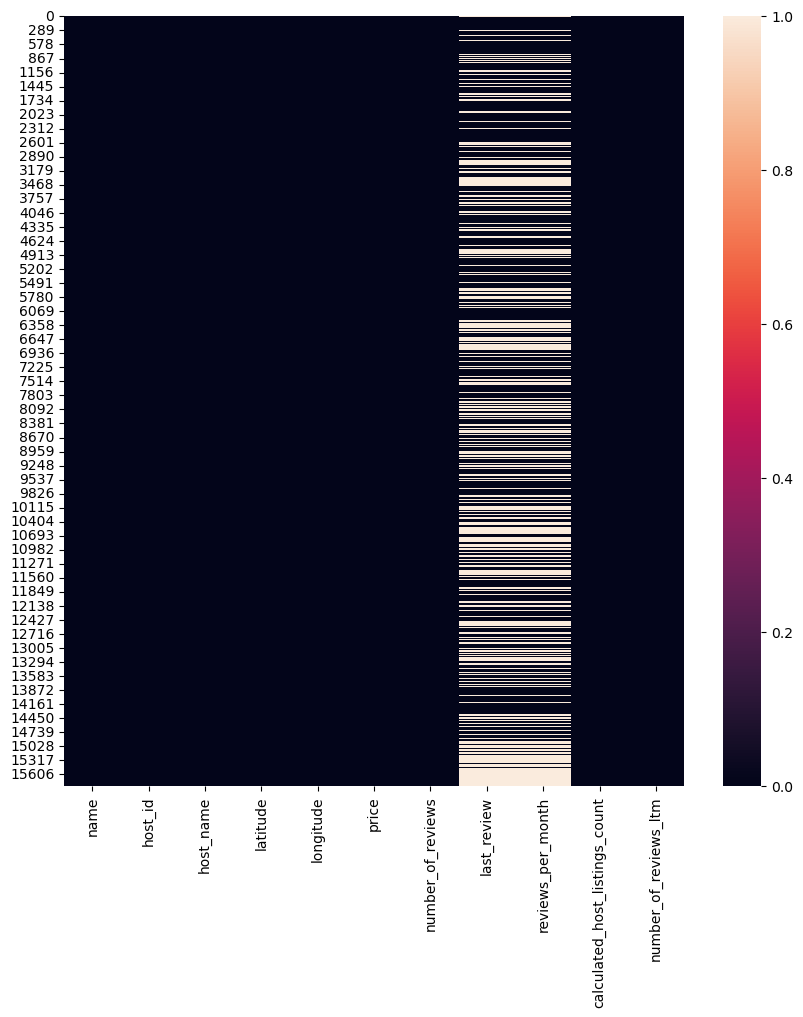

In [ ]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name', 'host_id', 'host_name', 'latitude', 'longitude', 'price', 'number_of_reviews', 'last_review','reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm']].isna())

In [ ]:
df['last_review'].value_counts()


2022-12-11    189
2022-12-14    184
2022-12-13    179
2022-12-12    172
2022-12-10    142
             ... 
2015-04-05    1  
2017-08-01    1  
2015-01-01    1  
2020-10-12    1  
2022-05-08    1  
Name: last_review, Length: 1669, dtype: int64

In [ ]:
df.loc[df['last_review']=='10/49','company_size']='2020-Januari-06'

In [ ]:
df['company_size'].value_counts()
#data 2020-01-06 sudah menjadi 2020-Januari-06

Series([], Name: company_size, dtype: int64)

Dari analisis di atas, kita sudah tau bahwa *missing value* `last_review` dan `reviews_per_month` saling berkaitan. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.  

In [ ]:
# jumlah missing value di kolom 'last_review' dan 'reviews_per_month'
df[['last_review', 'reviews_per_month']].isna().sum()

last_review          5790
reviews_per_month    5790
dtype: int64

Terdapat 5.790 data kosong di kolom `last_review` dan 5.790 di kolom `reviews_per_month`.
Pertama, kita akan coba melihat, apakah data-data kosong di kolom `last_review` dan `reviews_per_month` berasal dari distik yg sama atau berbeds? 

In [ ]:
# jumlah peminat dengan data kosong di 'name' dan 'host_name' berdasarkan 'name'
display(df[df['last_review'].isna()]['host_name'].value_counts(),
df[df['reviews_per_month'].isna()]['host_name'].value_counts())

Pornchai        57
Zuzu            38
Krittika        34
Lek Boonsiri    33
Elmer           28
                ..
Hilda           1 
Sea             1 
Ives            1 
Alcott          1 
Renee           1 
Name: host_name, Length: 3121, dtype: int64

Pornchai        57
Zuzu            38
Krittika        34
Lek Boonsiri    33
Elmer           28
                ..
Hilda           1 
Sea             1 
Ives            1 
Alcott          1 
Renee           1 
Name: host_name, Length: 3121, dtype: int64

Memang ada sebagian pegunjung yang datang hanya untuk menginap sehari, Kita bisa berasumsi bahwa pengunjung juga ingin mengunjungi tempat penginapan lain, tentunya untuk eskplore suasana baru, sehingga wajar mereka tidak mengisi data, yang berkaitan dengan review . Untuk itu, kita bisa **membuat kategory baru, _not available_, untuk mengisi data kosong di kolom `last_review` dan `reviews_per_month` dari pengunjung yang tidak melalukan review setelah menikmati penginapan**



In [ ]:
# mengisi data kosong dengan isi '0' pada 'nama' di kolom 'last_review' dan 'reviews_per_month' 
df.loc[(df['last_review'].isna())&(df['reviews_per_month'].isna())&(df['name']=='0'),['last_review', 'reviews_per_month']]='not available'

In [ ]:
# jumlah data kosong setelah pengisian
df[['last_review', 'reviews_per_month']].isna().sum()

last_review          5790
reviews_per_month    5790
dtype: int64

In [ ]:
# reviews_per_month  `name` dan `host_name`
pd.crosstab(df['name'],df['reviews_per_month'],normalize='index')

reviews_per_month,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,8.75,10.85,11.04,12.60,12.72,16.00,16.62,17.41,18.31,19.13
name,,,,,,,,,,,,,,,,,,,,,
!!!OMG!!/4 mins to Train St./Train Market/火车头夜市,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!NEW! Ultra Modern Condo-Sky Pool-Terminal 21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
""" Cozy and Warm house in Samsen /Dusit Bangkok""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""1 Bed Serviced SkyVillas with view""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Clean and Silent space around CHATUJAK""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🥇月租50%疫情居家办公曼谷市中心34F全景落地玻璃看日出日落Hermes主题两房两卫一厅一厨带阳台,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
🥇月租|50%BTS Nana Asoke25F超大一房48spm带阳台|居家办公区看日出日落,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
🥇月租|50%BTS TongLo 2min疫情居家办公全景玻璃大一房/阳台/办公区/厨房/wifi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# proporsi berdasarkan  `Last_review` dan `reviews_per_month``
pd.crosstab(df['last_review'],df['reviews_per_month'],normalize='index')

reviews_per_month,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,8.75,10.85,11.04,12.60,12.72,16.00,16.62,17.41,18.31,19.13
last_review,,,,,,,,,,,,,,,,,,,,,
2012-12-15,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2013-04-17,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2013-06-28,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2013-07-01,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2013-08-18,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-24,0.0,0.0,0.0,0.0,0.009009,0.0,0.000000,0.0,0.018018,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2022-12-25,0.0,0.0,0.0,0.0,0.000000,0.0,0.009524,0.0,0.000000,0.0,...,0.000000,0.009524,0.009524,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2022-12-26,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.008333,0.0,0.0,0.0,0.0


In [ ]:
# modus Last_review berdasarkan reviews_per_month
df.groupby(['last_review']).describe(include='object')['reviews_per_month']['top']

last_review
2012-12-15    0.03
2013-04-17    0.02
2013-06-28    0.07
2013-07-01    0.01
2013-08-18    0.01
              ... 
2022-12-24    1.00
2022-12-25    2.00
2022-12-26    1.00
2022-12-27    1.00
2022-12-28    3.00
Name: top, Length: 1669, dtype: float64

Dari hasil cross tabulasi di atas, kita akan mencoba mengisi sisa data kosong di kedua kolom dengan pendekatan berikut:
* **mengisi `last_rereviews_per_monthview` berdasarkan kolom `distrik`**. Secara logika, wilayah dengan populasi besar akan cenderung memiliki tempat penginapan dengan jumlah review yang banyak juga. Kita tidak bisa membuktikan asumsi ini dengan data, karena tidak ada datanya, namun, dari hasil **cross** tabulasi di atas, bisa dilihat bahwa proporsi `reviews_per_month` cukup acak berdasarkan distriknya.

* setelah kolom `reviews_per_month` terisi, kita akan **mengisi `last_review` berdasarkan `reviews_per_month`**. Dari hasil **cross** tabulasi, bisa dilihat bahwa tiap-tiap tipe penginapan memiliki kecenderungan jumlah review besar di 10 tahun yang lampau.

Pengisian data dengan pendekatan ini diharapkan tidak mengganggu distribusi data yang ada.

In [ ]:
# proporsi kategori2 di kolom `last_review` dan `reviews_per_month`
display(df['last_review'].value_counts()/df['last_review'].dropna().shape[0],
df['reviews_per_month'].value_counts()/df['reviews_per_month'].dropna().shape[0])

2022-12-11    0.018780
2022-12-14    0.018283
2022-12-13    0.017786
2022-12-12    0.017091
2022-12-10    0.014110
                ...   
2015-04-05    0.000099
2017-08-01    0.000099
2015-01-01    0.000099
2020-10-12    0.000099
2022-05-08    0.000099
Name: last_review, Length: 1669, dtype: float64

0.02     0.049483
0.03     0.046403
1.00     0.030207
0.05     0.024642
0.04     0.022158
           ...   
6.70     0.000099
4.26     0.000099
6.12     0.000099
4.57     0.000099
16.00    0.000099
Name: reviews_per_month, Length: 513, dtype: float64

In [ ]:
# index data kosong di kolom last_review
index_nan=df.loc[df['last_review'].isna()].index

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan